# Fine tuning classification: policy claims (IV) using ada

We will fine-tune an ada classifier to train six classifiers for each level 2 policy claim 4.1 to 4.6

In [1]:
import pandas as pd
import numpy as np
import re

import openai
import os

from sklearn.metrics import classification_report

# Set openai API key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [2]:
os.getcwd()

'/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/contrarian-discourses-against-cap-and-trade/Code'

In [3]:
val = pd.read_json('../Classifiers/Data/cat_hearings_03_10_val.json')
test = pd.read_json('../Classifiers/Data/cat_hearings_03_10_test.json')

## Fine-tuning

### 4.1 Climate policies are harmful

In [2]:
!openai api fine_tunes.create -t ../Classifiers/Data/train_4_1_prepared.jsonl -v ../Classifiers/Data/val_4_1_prepared.jsonl --compute_classification_metrics --classification_positive_class " 1.0" -m ada

Upload progress: 100%|███████████████████████| 521k/521k [00:00<00:00, 586Mit/s]
Uploaded file from ../Classifiers/Data/train_4_1_prepared.jsonl: file-P2sYm1xLw1Dg5RHjjBxqGBfW
Upload progress: 100%|███████████████████████| 113k/113k [00:00<00:00, 169Mit/s]
Uploaded file from ../Classifiers/Data/val_4_1_prepared.jsonl: file-l5YxjDPcyBhZeYgi3cZLocdW
Created fine-tune: ft-A26hPLBHX9Al8IpTKObcMc3D
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-24 15:39:56] Created fine-tune: ft-A26hPLBHX9Al8IpTKObcMc3D

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-A26hPLBHX9Al8IpTKObcMc3D



### 4.2 Climate policies are ineffective / flawed

In [3]:
!openai api fine_tunes.create -t ../Classifiers/Data/train_4_2_prepared.jsonl -v ../Classifiers/Data/val_4_2_prepared.jsonl --compute_classification_metrics --classification_positive_class " 1.0" -m ada

Upload progress: 100%|███████████████████████| 521k/521k [00:00<00:00, 648Mit/s]
Uploaded file from ../Classifiers/Data/train_4_2_prepared.jsonl: file-w0aH7HbBGqlWSbrrrz78OS3l
Upload progress: 100%|███████████████████████| 113k/113k [00:00<00:00, 109Mit/s]
Uploaded file from ../Classifiers/Data/val_4_2_prepared.jsonl: file-NZBpxlVRHQirl97obVnaBDxP
Created fine-tune: ft-wR8SVFG4SzpAWWq9rH1hwjEq
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-24 15:41:02] Created fine-tune: ft-wR8SVFG4SzpAWWq9rH1hwjEq

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-wR8SVFG4SzpAWWq9rH1hwjEq



### 4.3-4.6 Other reasons against policy 

In [102]:
!openai api fine_tunes.create -t ../Classifiers/Data/train_4_3456_prepared.jsonl -v ../Classifiers/Data/val_4_3456_prepared.jsonl --compute_classification_metrics --classification_positive_class " 1.0" -m ada

Found potentially duplicated files with name 'train_4_3456_prepared.jsonl', purpose 'fine-tune' and size 521374 bytes
file-AgK5Vel0pxSFIEPhGoVel3bO
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: ^C



#### Train another classifier with only three epochs (the recall dropped drastically after the third epoch in the previous classifier)

In [104]:
!openai api fine_tunes.create \
    -t file-AgK5Vel0pxSFIEPhGoVel3bO \
        -v file-XI8WrVy6fVKhLSY1PUVxSItU \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m ada --n_epochs=3

Created fine-tune: ft-MebtMOxmZNsZo4p7jB2Lteqt
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-01 15:15:01] Created fine-tune: ft-MebtMOxmZNsZo4p7jB2Lteqt

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-MebtMOxmZNsZo4p7jB2Lteqt



#### Add one more epoch

In [47]:
!openai api fine_tunes.create \
    -t file-AgK5Vel0pxSFIEPhGoVel3bO \
        -v file-XI8WrVy6fVKhLSY1PUVxSItU \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m ada:ft-university-of-exeter-2023-06-01-14-30-56 --n_epochs=1

Created fine-tune: ft-HTOvzGiUgO64H9mO4XeY9US4
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-01 15:33:43] Created fine-tune: ft-HTOvzGiUgO64H9mO4XeY9US4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-HTOvzGiUgO64H9mO4XeY9US4



## Results

### 4.1 Climate policies are harmful

In [4]:
!openai api fine_tunes.follow -i ft-A26hPLBHX9Al8IpTKObcMc3D
!openai api fine_tunes.results -i ft-A26hPLBHX9Al8IpTKObcMc3D > ../Classifiers/Results/result_4_1_ada_1.csv

[2023-05-24 15:39:56] Created fine-tune: ft-A26hPLBHX9Al8IpTKObcMc3D
[2023-05-24 15:42:52] Fine-tune costs $0.16
[2023-05-24 15:42:52] Fine-tune enqueued. Queue number: 2
[2023-05-24 15:43:14] Fine-tune is in the queue. Queue number: 1
[2023-05-24 15:43:58] Fine-tune is in the queue. Queue number: 0
[2023-05-24 15:43:59] Fine-tune started
[2023-05-24 15:48:02] Completed epoch 1/4
[2023-05-24 15:51:58] Completed epoch 2/4
[2023-05-24 15:55:52] Completed epoch 3/4
[2023-05-24 15:59:43] Completed epoch 4/4
[2023-05-24 16:00:11] Uploaded model: ada:ft-university-of-exeter-2023-05-24-15-00-10
[2023-05-24 16:00:12] Uploaded result file: file-Jqsst7LgXsR2DyOhms7eKLay
[2023-05-24 16:00:12] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-university-of-exeter-2023-05-24-15-00-10 -p <YOUR_PROMPT>


In [5]:
results_4_1 = pd.read_csv('../Classifiers/Results/result_4_1_ada_1.csv')
results_4_1.insert(9, 'claim', '4_1' )
results_4_1.insert(9, 'LLM', 'ada')
results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2362,ada,4_1,0.857708,0.714286,0.666667,0.903109,0.731884,0.689655


<AxesSubplot: >

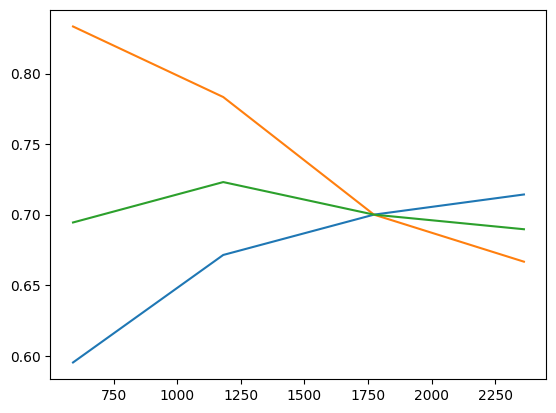

In [6]:
results_4_1[results_4_1['classification/precision'].notnull()]['classification/precision'].plot()
results_4_1[results_4_1['classification/recall'].notnull()]['classification/recall'].plot()
results_4_1[results_4_1['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [7]:
ft_model_4_1 = 'ada:ft-university-of-exeter-2023-05-24-15-00-10'

predicted_probabilities_4_1 = []
predicted_label_4_1 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_1, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_1.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_1.append(result['choices'][0]['text'])

predictions_4_1 = pd.DataFrame(zip(predicted_probabilities_4_1, predicted_label_4_1), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_1

,predicted_probabilities,predicted_label
0,"{'0': -11.694058, ' 0': -1.4736571e-05}",0
1,"{'0': -9.021887, ' 0': -0.00016602462}",0
2,"{'0': -12.202266, ' 0': -1.0681599e-05}",0
3,"{' 1': -8.496537, ' 0': -0.00022051518}",0
4,"{' 1': -7.056975, ' 0': -0.00088195427}",0
...,...,...
248,"{'0': -9.980046, ' 0': -7.422359e-05}",0
249,"{' 1': -2.0958114, ' 0': -0.13240394}",0
250,"{'0': -9.184864, ' 0': -0.000176637}",0
251,"{' 1': -0.22641543, ' 0': -1.5982436}",1


### 4.2 Climate policies are ineffective / flawed

In [8]:
!openai api fine_tunes.follow -i ft-wR8SVFG4SzpAWWq9rH1hwjEq
!openai api fine_tunes.results -i ft-wR8SVFG4SzpAWWq9rH1hwjEq > ../Classifiers/Results/result_4_2_ada_1.csv

[2023-05-24 15:41:02] Created fine-tune: ft-wR8SVFG4SzpAWWq9rH1hwjEq
[2023-05-24 16:00:39] Fine-tune costs $0.16
[2023-05-24 16:00:40] Fine-tune enqueued. Queue number: 6
[2023-05-24 16:07:21] Fine-tune is in the queue. Queue number: 5
[2023-05-24 16:09:24] Fine-tune is in the queue. Queue number: 4
[2023-05-24 16:14:01] Fine-tune is in the queue. Queue number: 3
[2023-05-24 16:14:17] Fine-tune is in the queue. Queue number: 2
[2023-05-24 16:15:41] Fine-tune is in the queue. Queue number: 1
[2023-05-24 16:19:19] Fine-tune is in the queue. Queue number: 0
[2023-05-24 16:22:23] Fine-tune started
[2023-05-24 16:26:36] Completed epoch 1/4
[2023-05-24 16:30:23] Completed epoch 2/4
[2023-05-24 16:34:15] Completed epoch 3/4
[2023-05-24 16:38:07] Completed epoch 4/4
[2023-05-24 16:38:35] Uploaded model: ada:ft-university-of-exeter-2023-05-24-15-38-34
[2023-05-24 16:38:36] Uploaded result file: file-oa6ltL1JVzvYU4gW3sonsUW0
[2023-05-24 16:38:36] Fine-tune succeeded

Job complete! Status: succee

In [9]:
results_4_2 = pd.read_csv('../Classifiers/Results/result_4_2_ada_1.csv')
results_4_2.insert(9, 'claim', '4_2' )
results_4_2.insert(9, 'LLM', 'ada')
results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2362,ada,4_2,0.936759,0.761905,0.592593,0.950344,0.745878,0.666667


<AxesSubplot: >

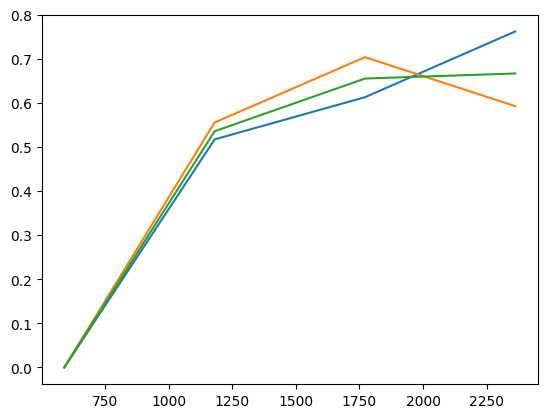

In [10]:
results_4_2[results_4_2['classification/precision'].notnull()]['classification/precision'].plot()
results_4_2[results_4_2['classification/recall'].notnull()]['classification/recall'].plot()
results_4_2[results_4_2['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [11]:
ft_model_4_2 = 'ada:ft-university-of-exeter-2023-05-24-15-38-34'

predicted_probabilities_4_2 = []
predicted_label_4_2 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_2, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_2.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_2.append(result['choices'][0]['text'])

predictions_4_2 = pd.DataFrame(zip(predicted_probabilities_4_2, predicted_label_4_2), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_2

,predicted_probabilities,predicted_label
0,"{' 1': -10.0259075, ' 0': -7.124244e-05}",0
1,"{'0': -10.091613, ' 0': -5.7177684e-05}",0
2,"{'0': -10.056072, ' 0': -5.9321566e-05}",0
3,"{' 1': -8.243139, ' 0': -0.00030702315}",0
4,"{' 1': -1.1094158, ' 0': -0.4009082}",0
...,...,...
248,"{' 1': -7.9248614, ' 0': -0.00048632707}",0
249,"{' 1': -4.702289, ' 0': -0.009279034}",0
250,"{' 1': -8.970902, ' 0': -0.00022987355}",0
251,"{' 1': -6.469119, ' 0': -0.0016286067}",0


### 4.3-4.6 Other reasons against policy 

In [12]:
!openai api fine_tunes.follow -i ft-Cq6mRIYl5ZCtRagsio9Ix7iJ
!openai api fine_tunes.results -i ft-Cq6mRIYl5ZCtRagsio9Ix7iJ > ../Classifiers/Results/result_4_3456_ada_1.csv

[2023-05-24 15:42:09] Created fine-tune: ft-Cq6mRIYl5ZCtRagsio9Ix7iJ
[2023-05-24 16:38:54] Fine-tune costs $0.16
[2023-05-24 16:38:54] Fine-tune enqueued. Queue number: 4
[2023-05-24 16:39:42] Fine-tune is in the queue. Queue number: 3
[2023-05-24 16:43:27] Fine-tune is in the queue. Queue number: 2
[2023-05-24 16:43:27] Fine-tune is in the queue. Queue number: 1
[2023-05-24 16:44:12] Fine-tune is in the queue. Queue number: 0
[2023-05-24 16:48:16] Fine-tune started
[2023-05-24 16:52:21] Completed epoch 1/4
[2023-05-24 16:56:16] Completed epoch 2/4
[2023-05-24 17:00:07] Completed epoch 3/4
[2023-05-24 17:04:00] Completed epoch 4/4
[2023-05-24 17:04:28] Uploaded model: ada:ft-university-of-exeter-2023-05-24-16-04-28
[2023-05-24 17:04:29] Uploaded result file: file-kyxw6A3OqC9YnKBbdTdWNcaD
[2023-05-24 17:04:29] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-university-of-exeter-2023-05-24-16-04-28 -p <YOUR_PR

In [13]:
results_4_3456 = pd.read_csv('../Classifiers/Results/result_4_3456_ada_1.csv')
results_4_3456.insert(9, 'claim', '4_3456' )
results_4_3456.insert(9, 'LLM', 'ada')
results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2363,ada,4_3456,0.956522,0.5,0.090909,0.872652,0.389667,0.153846


<AxesSubplot: >

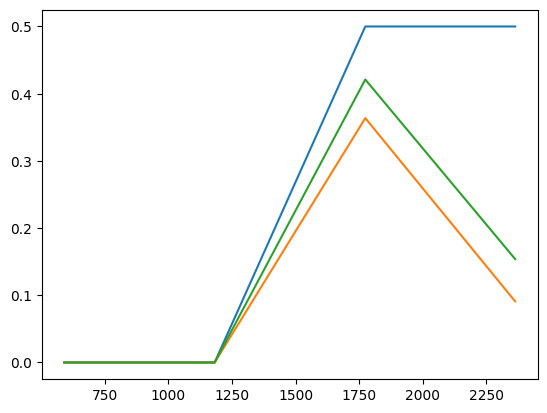

In [14]:
results_4_3456[results_4_3456['classification/precision'].notnull()]['classification/precision'].plot()
results_4_3456[results_4_3456['classification/recall'].notnull()]['classification/recall'].plot()
results_4_3456[results_4_3456['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [15]:
# !openai api fine_tunes.follow -i ft-MebtMOxmZNsZo4p7jB2Lteqt
# !openai api fine_tunes.results -i ft-MebtMOxmZNsZo4p7jB2Lteqt > ../Classifiers/Results/result_4_3456_ada_1.csv

In [16]:
# results_4_3456 = pd.read_csv('../Classifiers/Results/result_4_3456_ada_1.csv')
# results_4_3456.insert(9, 'claim', '4_3456' )
# results_4_3456.insert(9, 'LLM', 'ada')
# results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

In [17]:
# results_4_3456[results_4_3456['classification/precision'].notnull()]['classification/precision'].plot()
# results_4_3456[results_4_3456['classification/recall'].notnull()]['classification/recall'].plot()
# results_4_3456[results_4_3456['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [18]:
# !openai api fine_tunes.follow -i ft-HTOvzGiUgO64H9mO4XeY9US4
# !openai api fine_tunes.results -i ft-HTOvzGiUgO64H9mO4XeY9US4 > ../Classifiers/Results/result_4_3456_ada_1_epoch4.csv

In [19]:
# results_4_3456_epoch4 = pd.read_csv('../Classifiers/Results/result_4_3456_ada_1_epoch4.csv')
# results_4_3456_epoch4.insert(9, 'claim', '4_3456' )
# results_4_3456_epoch4.insert(9, 'LLM', 'ada')
# results_4_3456_epoch4.step = results_4_3456_epoch4.step + max(results_4_3456.step)
# results_4_3456 = results_4_3456.append(results_4_3456_epoch4).reset_index(drop=True)
# results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

In [20]:
# results_4_3456[results_4_3456['classification/precision'].notnull()]['classification/precision'].plot()
# results_4_3456[results_4_3456['classification/recall'].notnull()]['classification/recall'].plot()
# results_4_3456[results_4_3456['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [25]:
ft_model_4_3 = 'ada:ft-university-of-exeter-2023-05-24-16-04-28'

predicted_probabilities_4_3 = []
predicted_label_4_3 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_3, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_3.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_3.append(result['choices'][0]['text'])

predictions_4_3 = pd.DataFrame(zip(predicted_probabilities_4_3, predicted_label_4_3), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_3

,predicted_probabilities,predicted_label
0,"{' 1': -9.541432, ' 0': -8.471396e-05}",0
1,"{' 0': -1.2231317e-05, ' zero': -12.25751}",0
2,"{' 1': -10.392835, ' 0': -4.179789e-05}",0
3,"{' 1': -7.498197, ' 0': -0.0005835929}",0
4,"{' 1': -10.737835, ' 0': -4.608659e-05}",0
...,...,...
248,"{' -': -11.457744, ' 0': -2.0575926e-05}",0
249,"{' 1': -11.155278, ' 0': -3.655083e-05}",0
250,"{' 0': -1.7236207e-05, ' zero': -12.282022}",0
251,"{' 1': -8.529353, ' 0': -0.00022802629}",0


## Summary

In [26]:
pd.concat([results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)]).reset_index(drop=True)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,ada,4_1,0.857708,0.714286,0.666667,0.903109,0.731884,0.689655
1,ada,4_2,0.936759,0.761905,0.592593,0.950344,0.745878,0.666667
2,ada,4_3456,0.956522,0.500000,0.090909,0.872652,0.389667,0.153846


In [27]:
# Multi-hot encode the labels
val['predicted_labels_ada'] = pd.concat([predictions_4_1.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                          predictions_4_2.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                          predictions_4_3.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)], axis=1).values.tolist()

In [29]:
# ADA model results on validation data

# Print the classification report
print("Classification performance\n-------------------")
print(classification_report(val['labels'].values.tolist(), val['predicted_labels_ada'].values.tolist()))

# Check overall performance
# Print the classification report
print("Overall performance\n-------------------")
print(classification_report([1 if sum(i)>0 else 0 for i in val['labels']], [1 if sum(i)>0 else 0 for i in val['predicted_labels_ada']]))

Classification performance
-------------------
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        60
           1       0.80      0.59      0.68        27
           2       0.67      0.06      0.10        36

   micro avg       0.74      0.50      0.60       123
   macro avg       0.73      0.45      0.50       123
weighted avg       0.73      0.50      0.53       123
 samples avg       0.20      0.20      0.19       123

Overall performance
-------------------
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       153
           1       0.83      0.58      0.68       100

    accuracy                           0.79       253
   macro avg       0.80      0.75      0.76       253
weighted avg       0.79      0.79      0.78       253



/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Classification performance with the retrained model 4_3456 >> even worse, so has been dropped

# Classification performance
# -------------------
#               precision    recall  f1-score   support

#            0       0.72      0.68      0.70        60
#            1       0.76      0.59      0.67        27
#            2       1.00      0.03      0.05        36

#    micro avg       0.73      0.47      0.57       123
#    macro avg       0.83      0.43      0.47       123
# weighted avg       0.81      0.47      0.50       123
#  samples avg       0.19      0.19      0.18       123

# Overall performance
# -------------------
#               precision    recall  f1-score   support

#            0       0.76      0.93      0.84       153
#            1       0.84      0.56      0.67       100

#     accuracy                           0.78       253
#    macro avg       0.80      0.74      0.75       253
# weighted avg       0.79      0.78      0.77       253

In [30]:
# Save the predictions

val.to_json("../Classifiers/Data/cat_hearings_03_10_val_ada_labels.json")